In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from general import *


Feature Statistics:

Acceleration Magnitude:
count    79.000000
mean      1.101775
std       2.000750
min       0.087750
25%       0.134907
50%       0.394715
75%       1.319788
max      14.857705
Name: acceleration_magnitude, dtype: float64

Angular Velocity Magnitude:
count    79.000000
mean      8.667694
std      15.335046
min       0.060000
25%       0.186924
50%       1.105532
75%       7.659984
max      57.776956
Name: angular_velocity_magnitude, dtype: float64

Jerk Magnitude:
count     79.000000
mean      25.895176
std       57.231916
min        0.000000
25%        1.376085
50%        7.914544
75%       24.481321
max      378.056662
Name: jerk_magnitude, dtype: float64


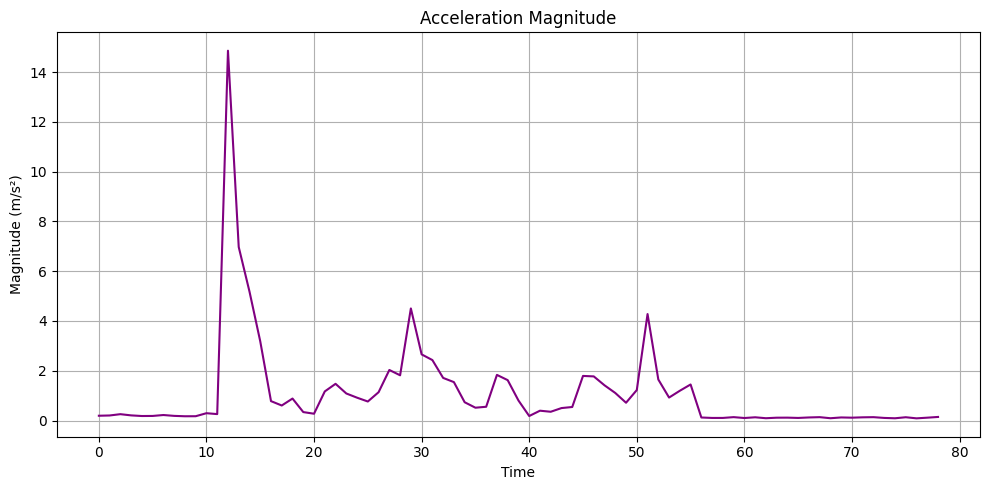


Basic Statistics for Acceleration Magnitude:
count    79.000000
mean      1.101775
std       2.000750
min       0.087750
25%       0.134907
50%       0.394715
75%       1.319788
max      14.857705
Name: acceleration_magnitude, dtype: float64


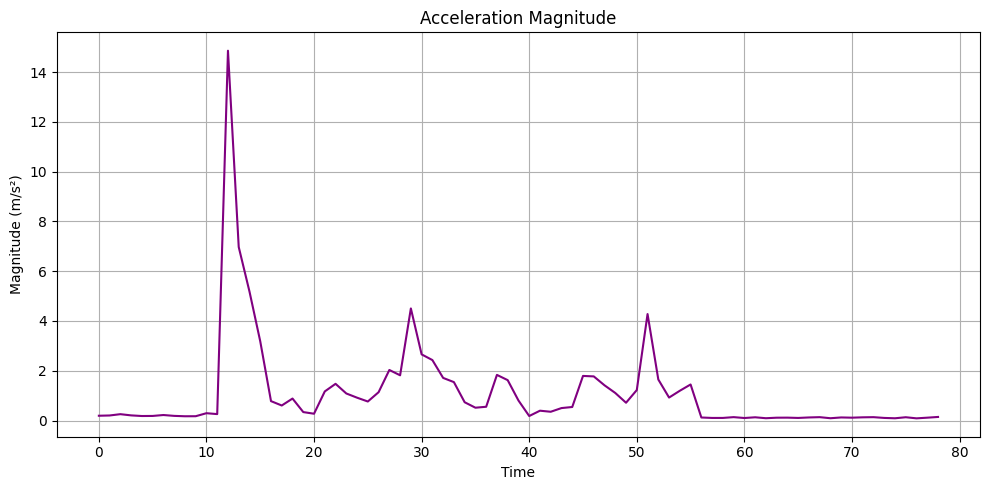

In [4]:
data = pd.read_csv('dataset/falls/f1.csv')
compute_all_features(data)
plot_acceleration_magnitude(data)


## Cropping

In [3]:
cropped_data = crop_fall(
    file_path='sessions/backFalls/S21.csv',
    start_index=0,
    fall_start=45,
    fall_end=55,
    save_path='dataset/falls/b1.csv'
)

Saved cropped dataset to dataset/falls/b1.csv
Original dataset length: 100
Cropped dataset length: 100
Number of fall samples: 11


In [2]:
from general import combine_sessions

training_files = [
    'dataset/normal/n1.csv',
    'dataset/normal/n2.csv',
    'dataset/normal/n3.csv',
    'dataset/normal/n4.csv',
    'dataset/normal/n5.csv',
    'dataset/normal/n6.csv',
    'dataset/normal/n7.csv',
    'dataset/normal/n8.csv'
]

# Combine all sessions
combined_dataset = combine_sessions(training_files)

# Save combined dataset
combined_dataset.to_csv('dataset/combined_training_data.csv', index=False)

In [4]:
def organize_columns(data):
    """
    Organize DataFrame columns by dropping environmental data and reordering columns
    
    Parameters:
    data (pd.DataFrame): Input DataFrame with all columns
    
    Returns:
    pd.DataFrame: DataFrame with organized columns
    """
    # Copy the input DataFrame
    organized_data = data.copy()
    
    # Drop environmental columns
    columns_to_drop = ['temperature', 'humidity', 'pressure', 'altitude']
    organized_data = organized_data.drop(columns=columns_to_drop, errors='ignore')
    
    # Define desired column order
    column_order = [
        'absolute_orientation[0]', 'absolute_orientation[1]', 'absolute_orientation[2]',
        'angular_velocity[0]', 'angular_velocity[1]', 'angular_velocity[2]',
        'linear_acceleration[0]', 'linear_acceleration[1]', 'linear_acceleration[2]',
        'acceleration_magnitude', 'angular_velocity_magnitude',
        'pitch', 'roll',
        'jerk[0]', 'jerk[1]', 'jerk[2]', 'jerk_magnitude',
        'fall'
    ]
    
    # Reorder columns (only include existing columns)
    existing_columns = [col for col in column_order if col in organized_data.columns]
    organized_data = organized_data[existing_columns]
    
    print("Columns dropped:", columns_to_drop)
    print("\nFinal column order:")
    print(organized_data.columns.tolist())
    
    return organized_data

data = pd.read_csv('dataset/combined_training_data.csv')
organized_data = organize_columns(data)
organized_data.to_csv('dataset/combined_training_data.csv', index=False)

Columns dropped: ['temperature', 'humidity', 'pressure', 'altitude']

Final column order:
['absolute_orientation[0]', 'absolute_orientation[1]', 'absolute_orientation[2]', 'angular_velocity[0]', 'angular_velocity[1]', 'angular_velocity[2]', 'linear_acceleration[0]', 'linear_acceleration[1]', 'linear_acceleration[2]', 'acceleration_magnitude', 'angular_velocity_magnitude', 'pitch', 'roll', 'jerk[0]', 'jerk[1]', 'jerk[2]', 'jerk_magnitude', 'fall']
